# This notebook examines trends in the processed general.txt file (general.pkl)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import os
import re
import cpi

processed_path = '/data/ihwang/data_journalism/allfac/processed/'
df_general = pd.read_pickle(processed_path + 'general.pkl')

# Agency prefix dictionary:
with open(processed_path + 'agency_dict.pkl', 'rb') as f_r:
    agency_dict = pickle.load(f_r)
# Entity code dictionary:
with open(processed_path + 'entity_dict.pkl', 'rb') as f_r:
    entity_dict = pickle.load(f_r)

Fields carried over from processing general.txt

In [2]:
for i in df_general.columns:
    print(i)

DBKEY
AUDITYEAR
STATE
CPASTATE
CPAPHONE
TYPEOFENTITY
COGAGENCY
OVERSIGHTAGENCY
TOTFEDEXPEND
LOWRISK
AUDITEENAME
CPAFIRMNAME
CPACONTACT
CPATITLE
ZIPCODE
CPAZIPCODE
TYPEREPORT_FS
TYPEREPORT_MP
REPORTABLECONDITION
MATERIALWEAKNESS
MATERIALNONCOMPLIANCE
REPORTABLECONDITION_MP
MATERIALWEAKNESS_MP
QCOSTS
GOINGCONCERN
CITY
CPACITY
EIN
DOLLARTHRESHOLD


Adjust `DOLLARTHRESHOLD` and `TOTFEDEXPEND_ADJUSTED` for inflation

In [3]:
df_general['DOLLARTHRESHOLD_ADJUSTED'] = df_general.apply(lambda x: cpi.inflate(x.DOLLARTHRESHOLD, x.AUDITYEAR), axis=1)
df_general['TOTFEDEXPEND_ADJUSTED'] = df_general.apply(lambda x: cpi.inflate(x.TOTFEDEXPEND, x.AUDITYEAR), axis=1)

# Basics

Select data to examine

In [4]:
df_analysis = df_general

How has the total number of audits changed over time?

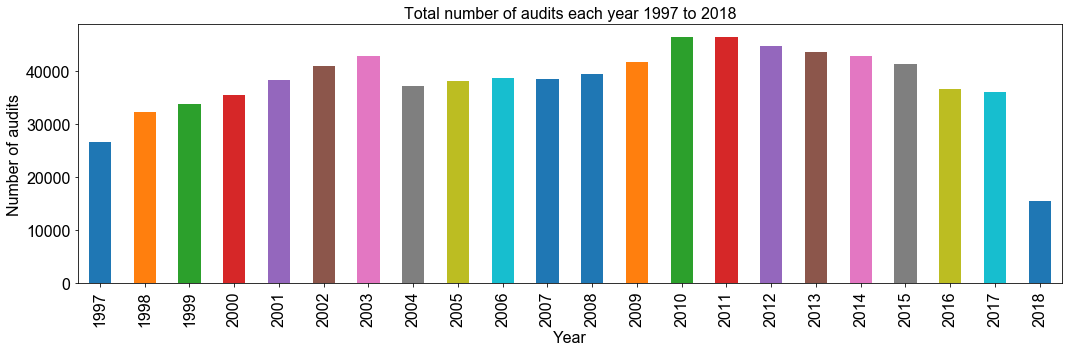

Total number of audits: 838217


In [5]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_num = df_analysis['AUDITYEAR'].value_counts().sort_index()
year_num_plot = series_year_num.plot(kind='bar', fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Number of audits', fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Total number of audits each year %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What is the total amount of federal money subjected to audits over time?

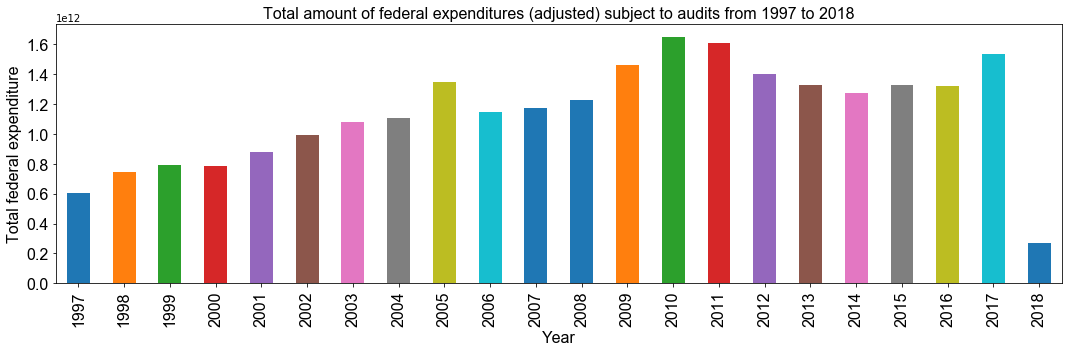

Total number of audits: 838217


In [7]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_totexpend = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].sum().sort_index()
year_totexpend_plot = series_year_totexpend.plot(kind='bar', fontsize=16, ax=axes)
year_totexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_totexpend_plot.set_ylabel('Total federal expenditure', fontsize=16, fontname='Arial')
year_totexpend_plot.set_title(
    'Total amount of federal expenditures (adjusted) subject to audits from %s to %s' 
    %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What has been each year's largest amount of federal money subject to an audit?

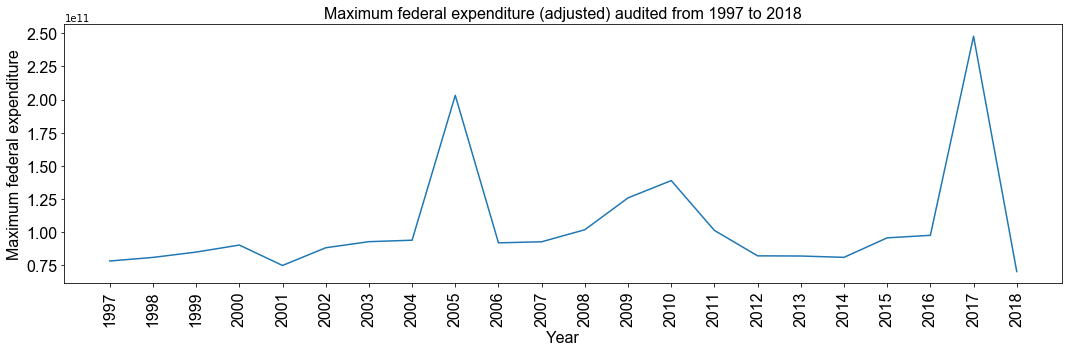

Total number of audits: 838217


In [8]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_maxexpend = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].max()
year_maxexpend_plot = series_year_maxexpend.plot(kind='line', fontsize=16, ax=axes)
year_maxexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_xticks(series_year_num.index)
year_maxexpend_plot.set_ylabel('Maximum federal expenditure', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_title(
    'Maximum federal expenditure (adjusted) audited from %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial', rotation=90)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

In [9]:
idx_year_max = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].transform(max) == df_analysis['TOTFEDEXPEND_ADJUSTED']
df_analysis[idx_year_max][['AUDITYEAR', 'AUDITEENAME', 'TOTFEDEXPEND_ADJUSTED']].sort_values('AUDITYEAR')

,AUDITYEAR,AUDITEENAME,TOTFEDEXPEND_ADJUSTED
70174,1997,CALIFORNIA STATE REPORT,7.834921e+10
70175,1998,CALIFORNIA STATE REPORT,8.104556e+10
70176,1999,STATE OF CALIFORNIA,8.506873e+10
70177,2000,STATE OF CALIFORNIA,9.036922e+10
70178,2001,STATE OF CALIFORNIA,7.498343e+10
70179,2002,STATE OF CALIFORNIA,8.832401e+10
70180,2003,STATE OF CALIFORNIA,9.291915e+10
70181,2004,STATE OF CALIFORNIA,9.402078e+10
785408,2005,JOHNS HOPKINS UNIVERSITY,2.032065e+11
70183,2006,STATE OF CALIFORNIA,9.203489e+10


What is the median `DOLLARTHRESHOLD_ADJUSTED` per year?

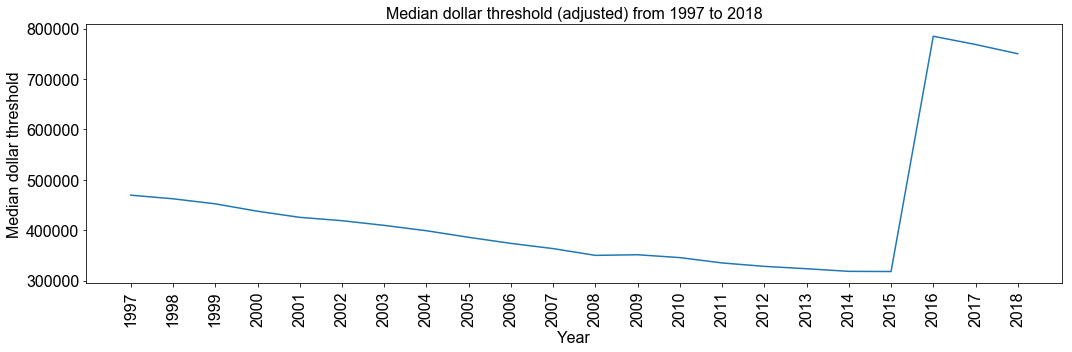

Total number of audits: 838217


In [10]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_maxexpend = df_analysis.groupby('AUDITYEAR')['DOLLARTHRESHOLD_ADJUSTED'].median()
year_maxexpend_plot = series_year_maxexpend.plot(kind='line', fontsize=16, ax=axes)
year_maxexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_xticks(series_year_num.index)
year_maxexpend_plot.set_ylabel('Median dollar threshold', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_title(
    'Median dollar threshold (adjusted) from %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial', rotation=90)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What percent of auditees are low risk?

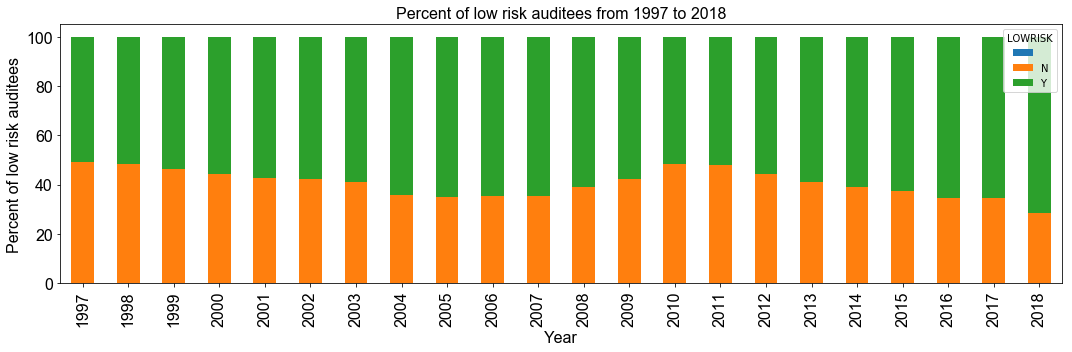

Total number of audits: 838217


In [11]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_num = df_analysis.groupby('AUDITYEAR')['LOWRISK'].value_counts().sort_index().unstack()
df_year_pct = df_year_num.div(df_year_num.sum(axis=1), axis=0) * 100
year_num_plot = df_year_pct.plot(kind='bar', stacked=True, fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Percent of low risk auditees', fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Percent of low risk auditees from %s to %s' 
    %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What percent of auditees have a financial issue? Choose between `QCOSTS`, `GOINGCONCERN`, `MATERIALWEAKNESS`, `MATERIALNONCOMPLIANCE`

In [37]:
# sortby = 'QCOSTS'
# sortby = 'GOINGCONCERN'
# sortby = 'MATERIALWEAKNESS'
sortby = 'MATERIALNONCOMPLIANCE'

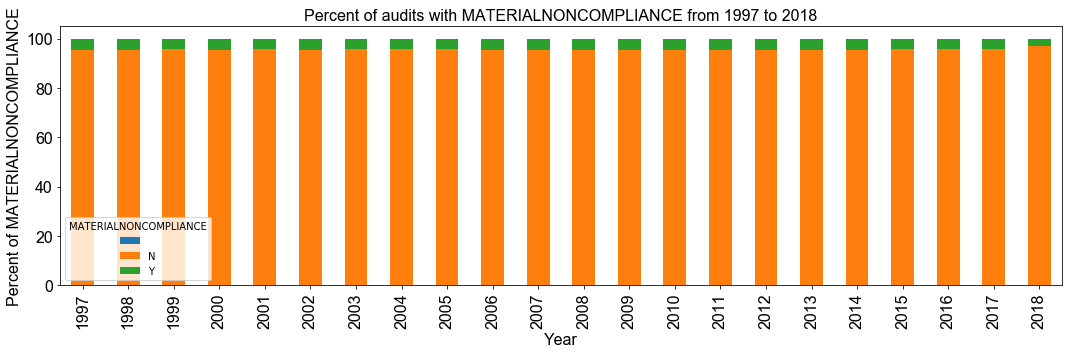

Total number of audits: 831431


In [38]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_num = df_analysis.groupby('AUDITYEAR')[sortby].value_counts().sort_index().unstack()
df_year_pct = df_year_num.div(df_year_num.sum(axis=1), axis=0) * 100
year_num_plot = df_year_pct.plot(kind='bar', stacked=True, fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_xticklabels(labels=series_year_num.index, fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Percent of %s' %sortby, fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Percent of audits with %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

## Do more specific analysis based on selected data and sortby

Select data

In [14]:
df_analysis = df_general
# df_analysis = df_general[df_general['LOWRISK']=='N']
# df_analysis = df_general[df_general['TOTFEDEXPEND'] <= 1e6]
# df_analysis = df_general[df_general['TOTFEDEXPEND'] >= 3e6]
# df_analysis = df_general[(df_general['TOTFEDEXPEND'] >= 1e6) & (df_general['TOTFEDEXPEND'] <= 5e6)]

# Remove territories/islands
df_analysis = df_analysis[~df_analysis['STATE'].isin(['AS','MP','FM','PR','GU','PW','MH','VI'])]

Select sortby

In [48]:
sortby = 'TYPEOFENTITY'
# sortby = 'STATE'
# sortby = 'COGAGENCY'
# sortby = 'OVERSIGHTAGENCY'

Now plot percent of audits by entity type

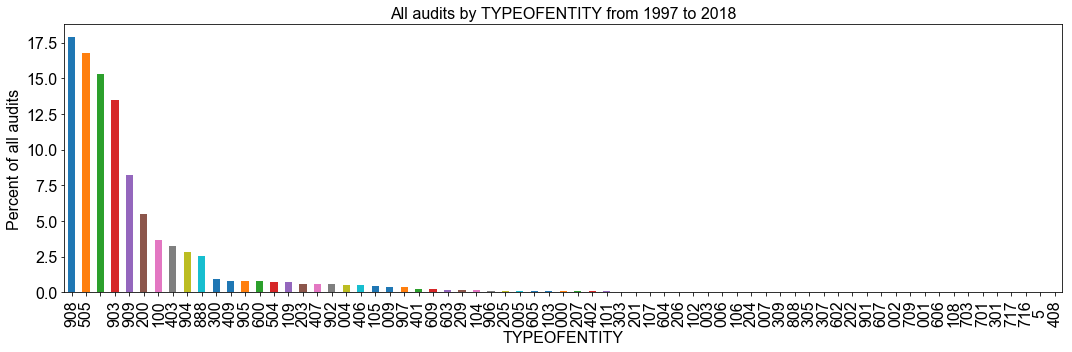

Total number of audits: 831431


In [16]:
fig, axes = plt.subplots(figsize=(15, 5))
series_sortby = df_analysis.groupby(sortby).size().sort_values(ascending=False) / len(df_analysis) * 100
percent_audits_plot = series_sortby.plot(kind='bar', fontsize=16, ax=axes)
percent_audits_plot.set_xlabel(sortby, fontsize=16, fontname='Arial')
percent_audits_plot.set_xticklabels(labels=series_sortby.index, fontsize=16, fontname='Arial')
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16, fontname='Arial')
percent_audits_plot.set_title(
    'All audits by %s from %s to %s' %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

In [17]:
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.head(10).index:
        if entity in entity_dict.keys():
            print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.head(10).index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERISGHTAGENCY'):
    for agency in series_sortby.head(10).index:
        if agency in agency_dict.keys():
            print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

17.8734014007 	 908 	 Non-profit Social Services Organization
16.754006045 	 505 	 Independent Local Education Agency (LEA)
15.3038556417 	     	
13.4519881987 	 903 	 Non-profit Housing Organization
8.18552591857 	 909 	 Non-profit Other Organization
5.51013854427 	 200 	 Municipality-General Purpose Government
3.66440510397 	 100 	 County-General Purpose Government
3.21614180852 	 403 	 Independent Special District Housing Authority
2.78808463962 	 904 	 Non-profit Institution for Higher Education
2.56509560024 	 888 	 UNKNOWN


What are trends over time?

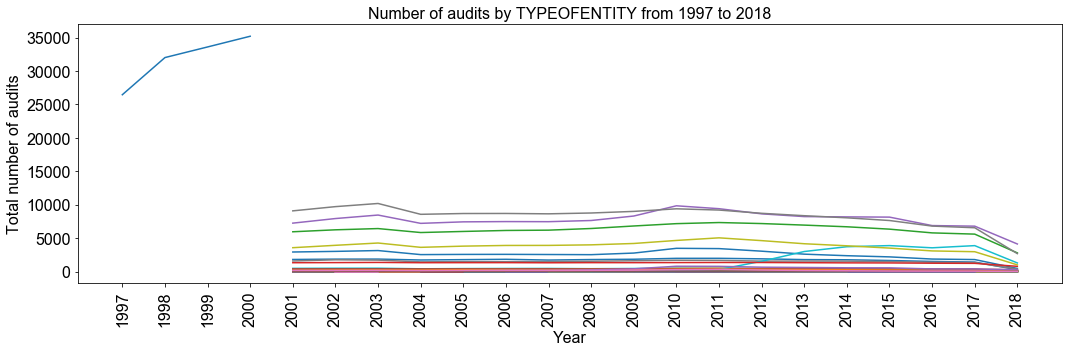

In [18]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_sortby = df_analysis.groupby('AUDITYEAR')[sortby].value_counts().unstack()
year_sortby_plot = df_year_sortby.plot(kind='line', fontsize=16, ax=axes, legend=False)
year_sortby_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_sortby_plot.set_xticks(df_year_sortby.index)
year_sortby_plot.set_xticklabels(labels=df_year_sortby.index, fontsize=16, fontname='Arial', rotation=90)
year_sortby_plot.set_ylabel('Total number of audits', fontsize=16, fontname='Arial')
year_sortby_plot.set_title(
    'Number of audits by %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()

In [19]:
year = 2017
series_sortby = df_year_sortby.loc[year].sort_values(ascending=False).head(10)
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.index:
        if entity in entity_dict.keys():
                print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERSIGHTAGENCY'):
    for agency in series_sortby.index:
        if agency in agency_dict.keys():
                print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

6788.0 	 505 	 Independent Local Education Agency (LEA)
6550.0 	 908 	 Non-profit Social Services Organization
5597.0 	 903 	 Non-profit Housing Organization
3875.0 	 888 	 UNKNOWN
2965.0 	 909 	 Non-profit Other Organization
1793.0 	 200 	 Municipality-General Purpose Government
1418.0 	 100 	 County-General Purpose Government
1339.0 	 403 	 Independent Special District Housing Authority
1224.0 	 904 	 Non-profit Institution for Higher Education
392.0 	 905 	 Non-profit School


What are the total federal expenditures over time?

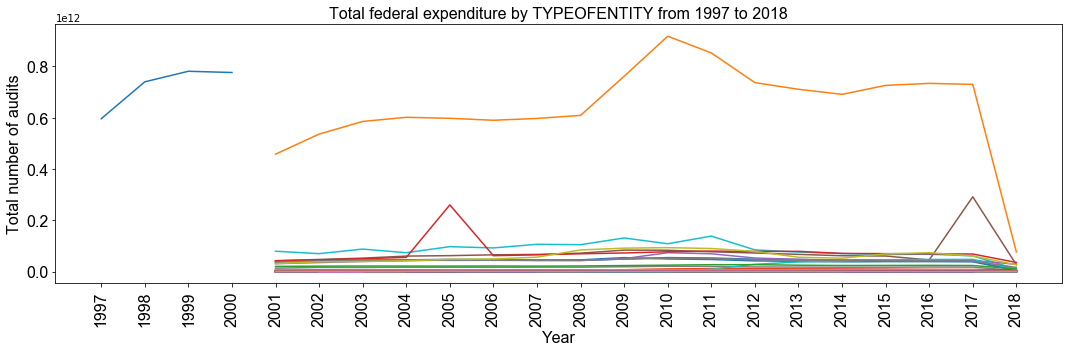

In [60]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_sortby_expend = df_analysis.groupby(['AUDITYEAR', sortby])['TOTFEDEXPEND_ADJUSTED'].sum().unstack()
# df_year_sortby_expend.drop(index=[1997,1998,1999,2000],columns='000', inplace=True)
year_sortby_expend_plot = df_year_sortby_expend.plot(kind='line', fontsize=16, ax=axes, legend=False)
year_sortby_expend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_sortby_expend_plot.set_xticks(df_year_sortby.index)
year_sortby_expend_plot.set_xticklabels(labels=df_year_sortby.index, fontsize=16, fontname='Arial', rotation=90)
year_sortby_expend_plot.set_ylabel('Total number of audits', fontsize=16, fontname='Arial')
year_sortby_expend_plot.set_title(
    'Total federal expenditure by %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()

In [61]:
year = 2017
series_sortby = df_year_sortby_expend.loc[year].sort_values(ascending=False).head(10)
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.index:
        if entity in entity_dict.keys():
                print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERSIGHTAGENCY'):
    for agency in series_sortby.index:
        if agency in agency_dict.keys():
                print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

730082650844.0 	 000 	 State-Wide
291548618120.0 	 004 	 State-Dependent Institution of Higher Education
68371622889.4 	 904 	 Non-profit Institution for Higher Education
61124478674.6 	 009 	 State-Dependent Other Agency
60671814688.1 	 909 	 Non-profit Other Organization
47313842739.9 	 888 	 UNKNOWN
43502048136.2 	 505 	 Independent Local Education Agency (LEA)
41391164429.1 	 200 	 Municipality-General Purpose Government
40612292657.8 	 908 	 Non-profit Social Services Organization
37824717964.2 	 100 	 County-General Purpose Government


Select two axes to compare

In [22]:
series_dict = {}

series_sortby = df_analysis.groupby(sortby).size().sort_values(ascending=False) / len(df_analysis) * 100
series_dict['Percent of all audits'] = series_sortby

for fs_sortby in ['QCOSTS', 'GOINGCONCERN','MATERIALWEAKNESS','MATERIALNONCOMPLIANCE']:
    df_fs_sortby = df_analysis.groupby(sortby)[fs_sortby].value_counts().sort_index().unstack()
    df_fs_sortby_norm = df_fs_sortby.div(df_fs_sortby.sum(axis=1), axis=0) * 100
    series_fs_sortby = df_fs_sortby_norm['Y']
    series_dict[fs_sortby] = series_fs_sortby
    
series_sortby_expenditures = df_analysis.groupby(sortby)['TOTFEDEXPEND_ADJUSTED'].sum().sort_values(ascending=False) / df_analysis['TOTFEDEXPEND_ADJUSTED'].sum() * 100
series_dict['Percent of total expenditure'] = series_sortby_expenditures

print(series_dict.keys())

dict_keys(['Percent of all audits', 'QCOSTS', 'GOINGCONCERN', 'MATERIALWEAKNESS', 'MATERIALNONCOMPLIANCE', 'Percent of total expenditure'])


In [125]:
series_1 = 'Percent of total expenditure'
series_2 = 'MATERIALNONCOMPLIANCE'

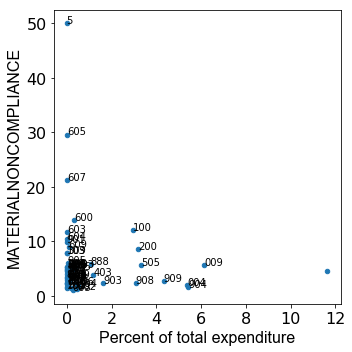

In [126]:
fig, axes = plt.subplots(figsize=(5, 5))
df_plot = pd.concat(
    [series_dict[series_1].rename('series1'), series_dict[series_2].rename('series2')], 
    axis=1, sort=True
)
df_plot.dropna(inplace=True)
df_plot.drop(index='000', inplace=True)  # Drop obvious outlier
plot = df_plot.plot(
    x='series1', y='series2', kind='scatter', fontsize=16, ax=axes
)
for i, point in df_plot.iterrows():
    axes.text(point['series1'], point['series2'], str(i))
plot.set_xlabel(series_1, fontsize=16, fontname='Arial')
plot.set_ylabel(series_2, fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()

In [127]:
df_plot.sort_values('series2', ascending=False)

,series1,series2
5,0.000006,50.000000
605,0.027229,29.572447
607,0.000707,21.212121
600,0.343102,13.828100
100,2.960588,12.101618
603,0.026617,11.731044
604,0.011870,10.416667
901,0.001594,9.803922
609,0.077917,8.938245
200,3.172121,8.501954


In [132]:
df_plot.loc['605']['series1'] * df_analysis['TOTFEDEXPEND_ADJUSTED'].sum() * .01

6762447120.4899549